In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 5

from ea_giving_optimizer.helpers import (
    Config,
    best_giving_optuna,
    tot_give,
    cum_res_dicts,
    apply_cum_metrics
)

## Configure assumptions (or use default)

In [11]:
c = Config()
c.df.head(3)

/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,salary_k,share_tax,req_cost_k_year,leak_multiplier,years,compound_interest,salary_k_year,salary_k_year_after_tax,disposable_salary,cum_disposable_k,cum_disp_inc_return_k,cum_disp_inc_return_m,disposable_salary_w_interest
age,,,,,,,,,,,,,
30,53.0,0.272,240.0,0.95,0,1.0000,636.0,463.0,223.0,223.0,223.0,0.22,223.0
31,54.2,0.000,240.0,0.94,1,0.9900,650.4,0.0,223.0,446.0,446.0,0.45,223.0
32,55.4,0.000,240.0,0.93,2,0.9801,664.8,0.0,223.0,669.0,669.0,0.67,223.0


## Get recommended giving share per age

In [22]:
# If negative return after existential risk, then the baseline trial number 1 should win, giving everything
# each year without waiting
give_share_rec = best_giving_optuna(c=c, n_trials=10)

[I 2022-01-04 00:56:30,364] A new study created in memory with name: no-name-67f0b8a3-06ed-4b4a-8a21-ff67c642e47b
/Users/simonandersson/Desktop/code/ea-giving-optimizer/ea_giving_optimizer/helpers.py:249: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
  study.enqueue_trial(give_last_dict)
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
/Users/simonandersson/Desktop/code/ea-giving-optimizer/.env/lib/python3.8/site-packages/optuna/study/study.py:856: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  self.add_trial(
/Users/simonandersson/Desktop/code/ea-giving-optimizer/ea_giving_optimizer/helpers.py:

[I 2022-01-04 00:56:30,433] Trial 7 finished with value: 7996.323639505633 and parameters: {30: 0.6871383948086978, 31: 0.16812712570966104, 32: 0.2358908101681252, 33: 0.007676309011183768, 34: 0.5749572551901521, 35: 0.12605568694583558, 36: 0.05191612216831021, 37: 0.16211942742252805, 38: 0.553408612632624, 39: 0.15943362852428822, 40: 0.32617824199341894, 41: 0.0864431938950797, 42: 0.24628805751928473, 43: 0.35599964624711056, 44: 0.17747207703315881, 45: 0.8040924825932326, 46: 0.2541692293832063, 47: 0.6110308589944407, 48: 0.5576525694198958, 49: 0.6347245751326868, 50: 0.018709531755286113, 51: 0.635241358714659, 52: 0.7766238990958957, 53: 0.9653100942039792, 54: 0.5820659750558497, 55: 0.2096894015927393, 56: 0.03184683130181898, 57: 0.7481803280191412, 58: 0.2165647928782949, 59: 0.39569424062655034, 60: 0.03793418217701572, 61: 0.5923630481789375, 62: 0.24502857447985005, 63: 0.4221228062200658, 64: 0.950579418785555, 65: 0.8531258098781994, 66: 0.25696289293524543, 67: 0

## Summarize results

240 lives saved


<AxesSubplot:xlabel='age'>

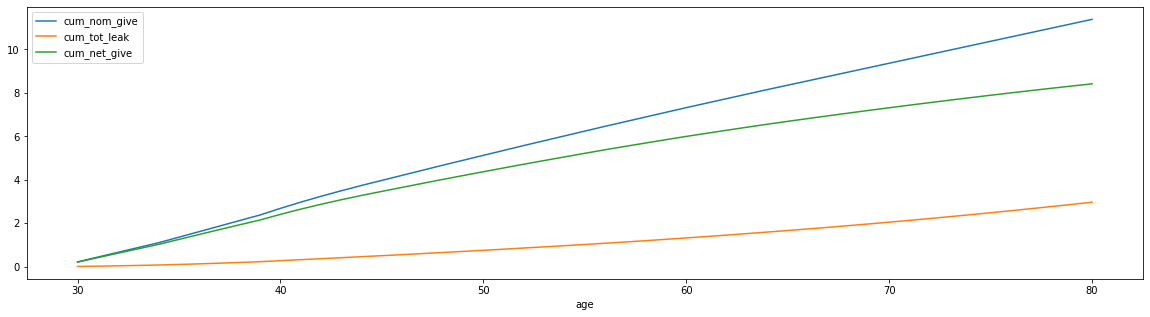

In [16]:
c = apply_cum_metrics(c, give_share_rec)
c.print_lives_saved()
(c.df.iloc[:, -3:]/1000).plot()

## Naive reality check

In [21]:
# Reality check vs disposable salary per year giving everything but no interest or discounting of ex risk
# Should be higher than "optimized" result if net return is lower than 1 due to existential risk discounting 
# (leading to giving everything immediately being the best solution)
print(round((c.df.disposable_salary/c.save_qa_life_cost_k).sum()), "lives saved naive calculation no interest or discounting")

328 lives saved naive calculation no interest or discounting
